## Supermarket Sales
Historical record of sales data in 3 different supermarkets

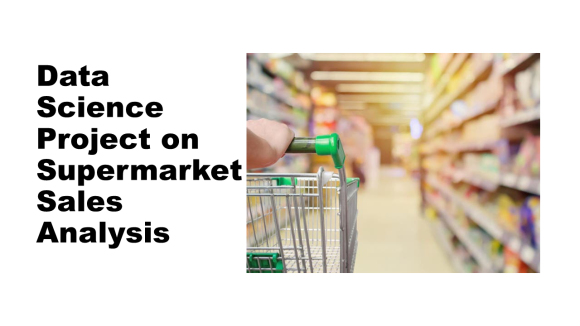

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('supermarket_sales - Sheet1.csv')

## Basic Checks

In [3]:
# First five rows
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Last five rows
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
# Shape of data
data.shape

(1000, 17)

* Dataset contains 17 columns with 1000 observations.

In [6]:
# columns in data
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# Statistics of data
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


## Exploratory Data Analysis

#### Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

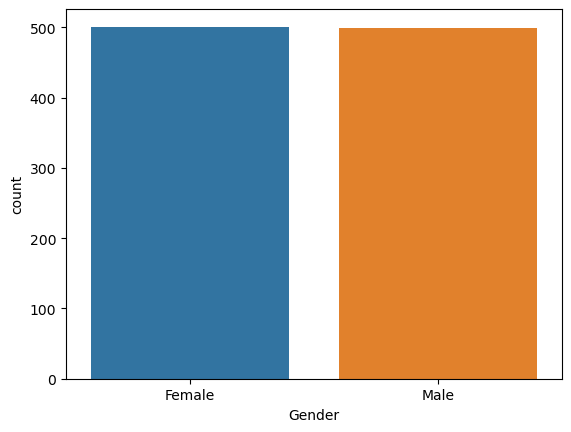

In [10]:
sns.countplot(x='Gender',data=data)

#### Bivariate Analysis

<AxesSubplot:xlabel='City'>

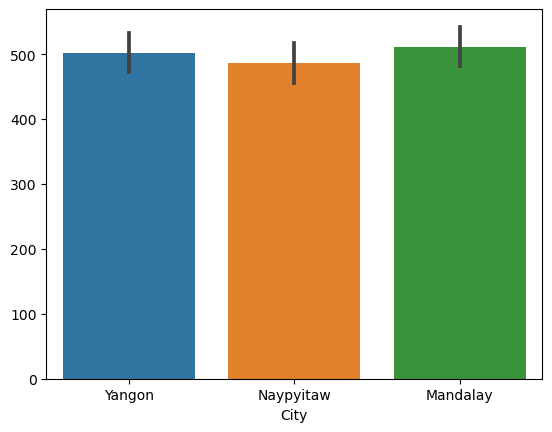

In [11]:
sns.barplot(x=data['City'],y=data['City'].index,data=data)

<AxesSubplot:xlabel='Payment'>

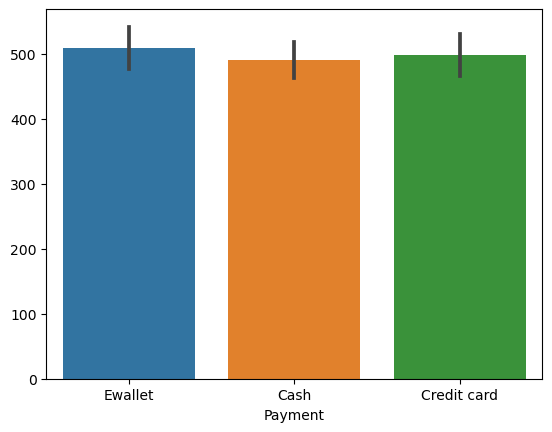

In [12]:
sns.barplot(x=data['Payment'],y=data['Payment'].index,data=data)

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

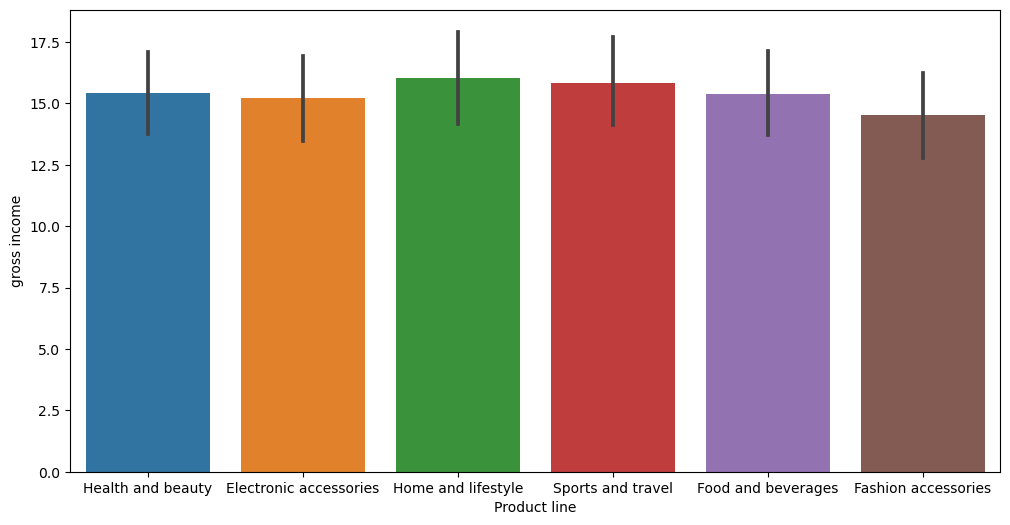

In [13]:
plt.figure(figsize= (12,6))
sns.barplot(x = data['Product line'], y = data['gross income'])

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

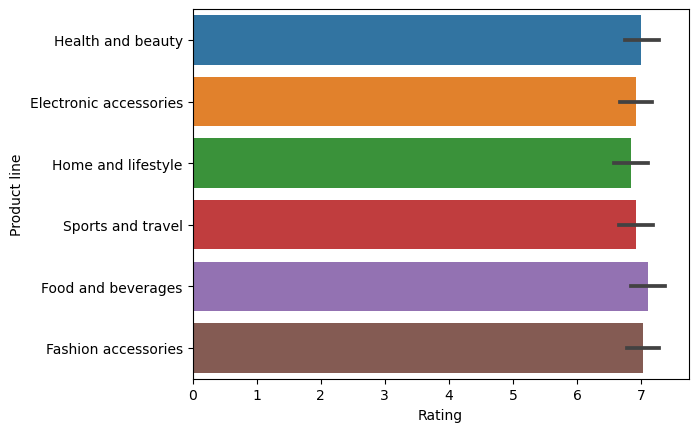

In [14]:
sns.barplot(y = data['Product line'], x = data['Rating'])

<AxesSubplot:xlabel='Total', ylabel='Product line'>

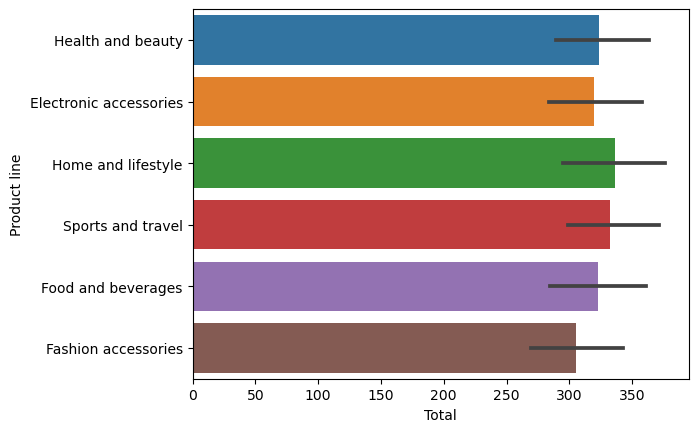

In [15]:
sns.barplot(x = data['Total'] , y = data['Product line'])

#### Multivariate Analysis

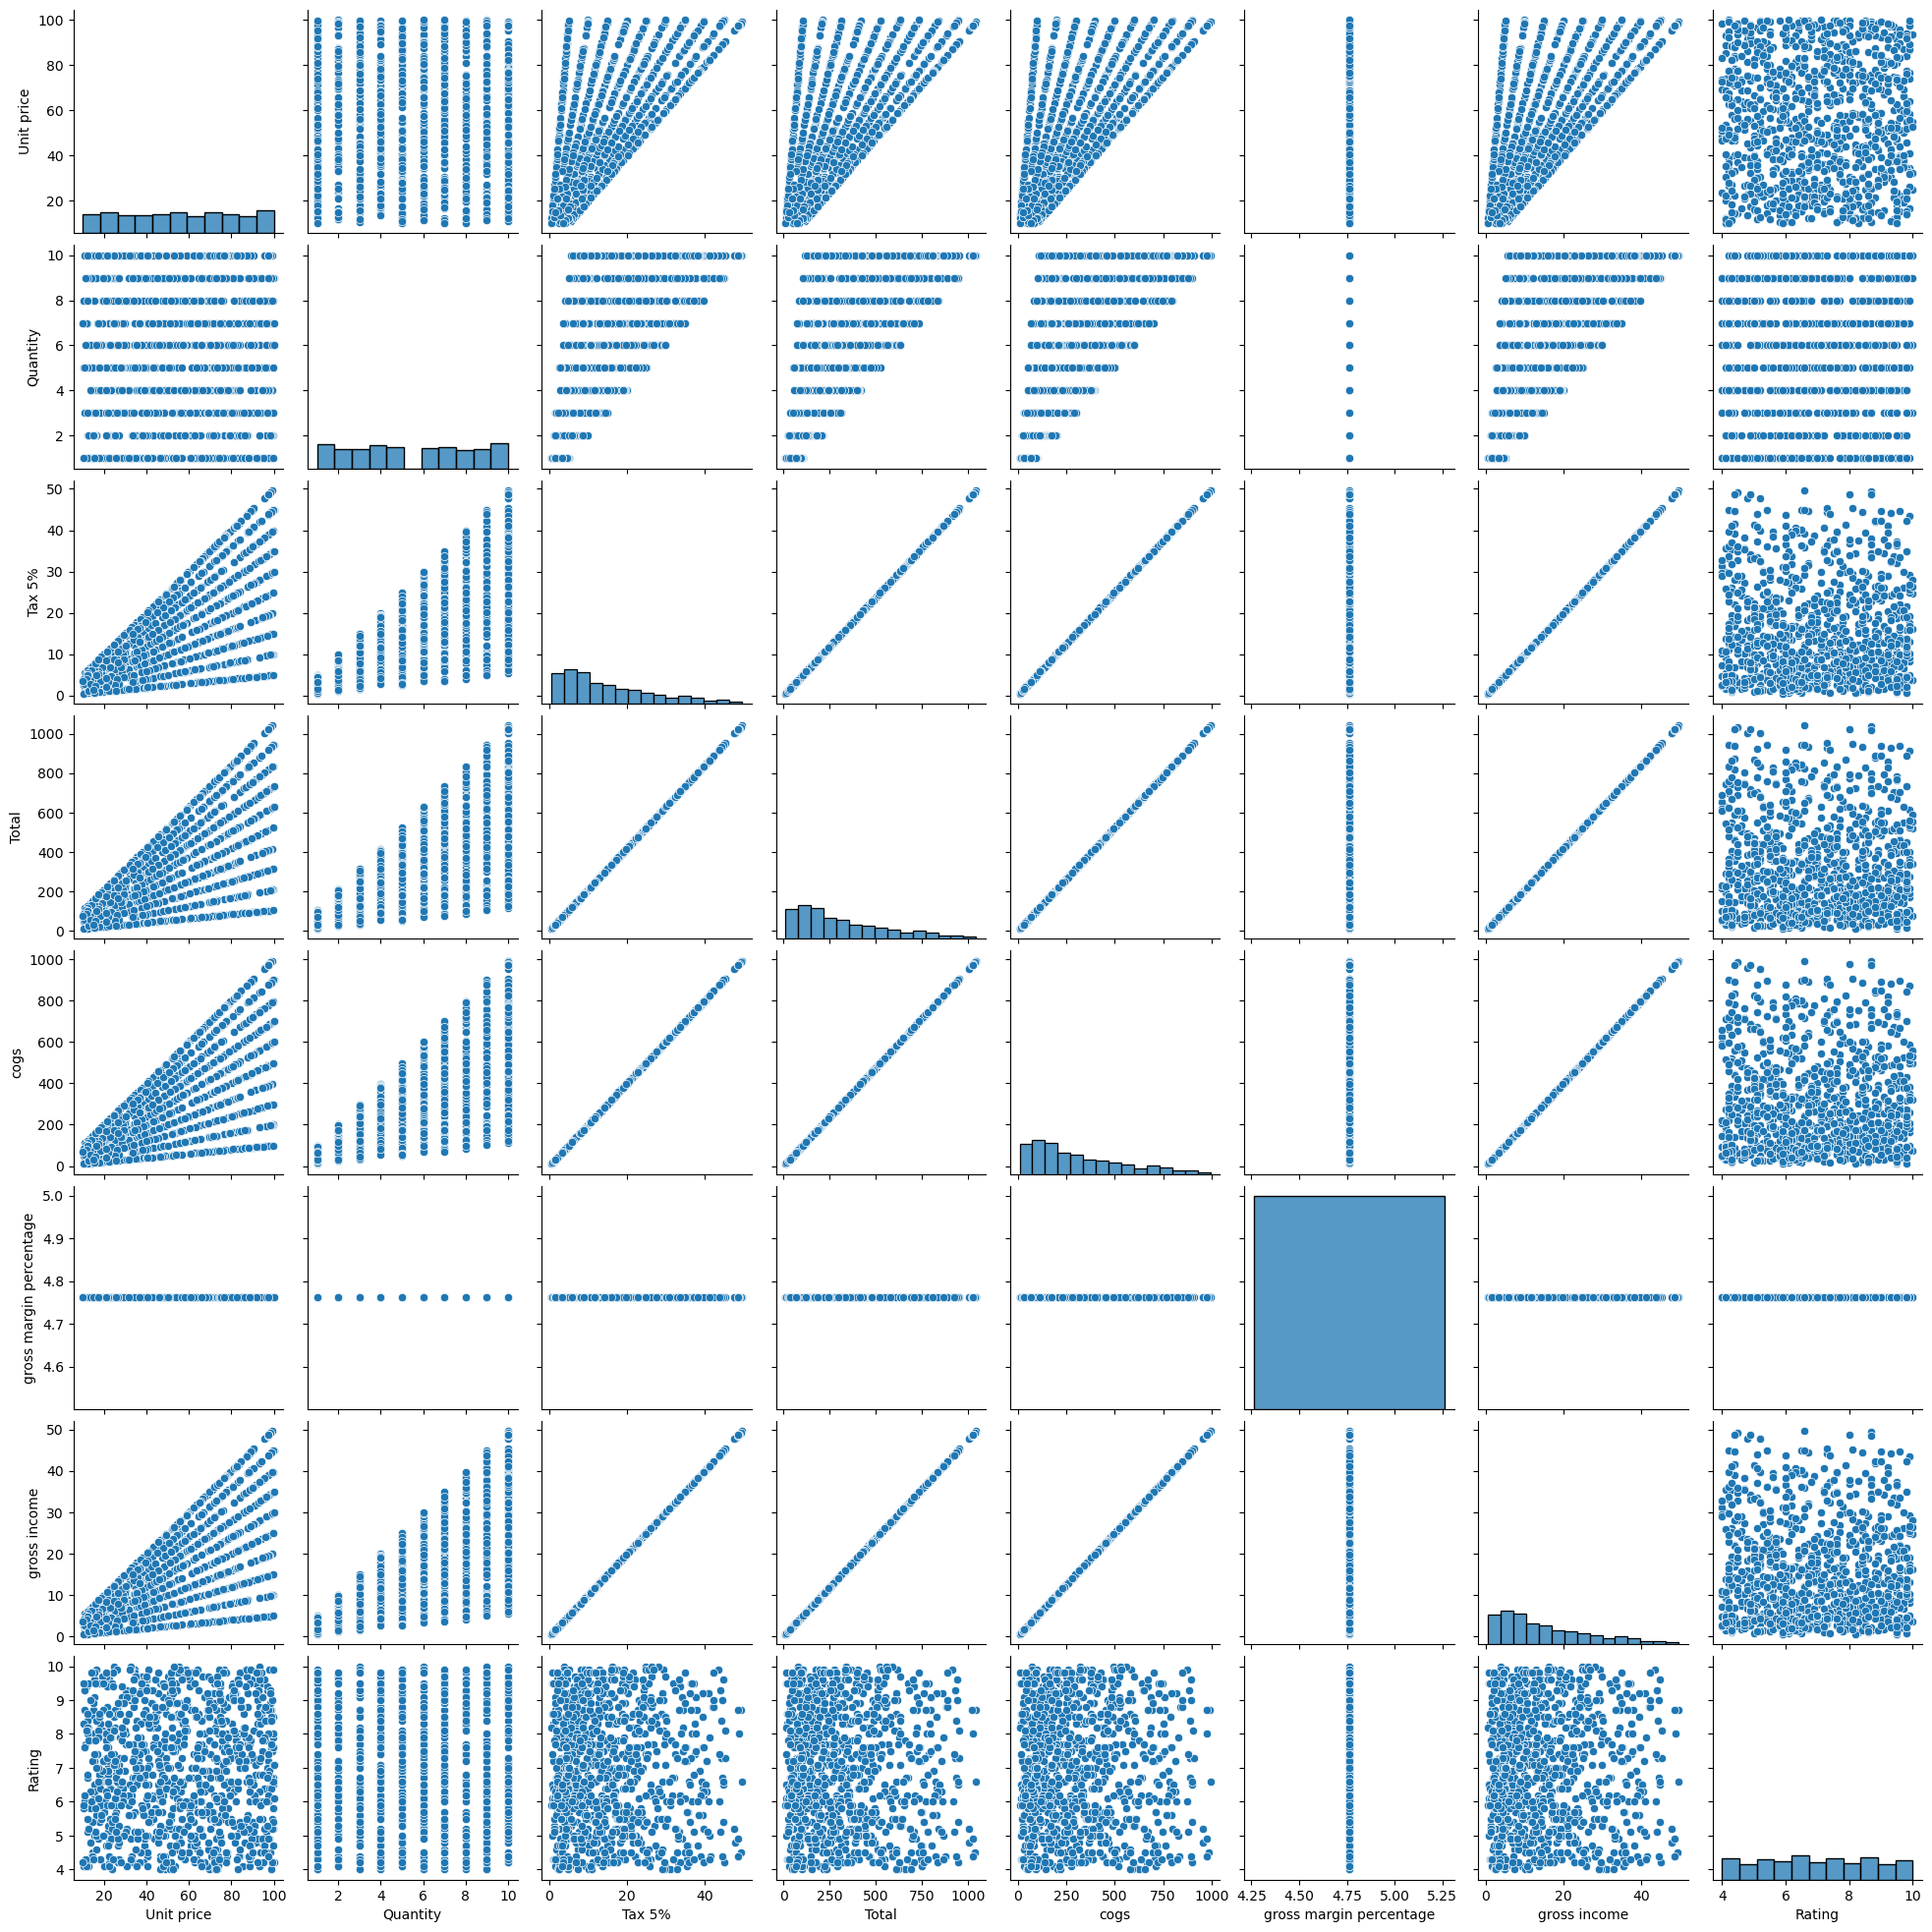

In [16]:
sns.pairplot(data)

## Data Preprocessing

In [17]:
data.drop('Invoice ID',axis=1,inplace=True)
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
# Check missing values
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

* No missing values present in dataset.

In [19]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [20]:
data['Branch']=data['Branch'].map({'A':2,'B':1,'C':0})

In [21]:
data.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [22]:
data['City']=data['City'].map({'Yangon':2,'Mandalay':1,'Naypyitaw':0})

In [23]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [24]:
data['Customer type']=data['Customer type'].map({'Member':1,'Normal':0})

In [25]:
data.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [26]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [27]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Product line']=lb.fit_transform(data['Product line'])

In [29]:
data['Product line'].value_counts()

1    178
2    174
0    170
5    166
4    160
3    152
Name: Product line, dtype: int64

In [30]:
data.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [31]:
data.Payment=data.Payment.map({'Ewallet':2,'Cash':1,'Credit card':0})

In [32]:
# Changing the Date & Time from object to datetime 
data['Date']= pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   int64         
 1   City                     1000 non-null   int64         
 2   Customer type            1000 non-null   int64         
 3   Gender                   1000 non-null   int64         
 4   Product line             1000 non-null   int32         
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   int64         
 12  cogs                     1000 non-n

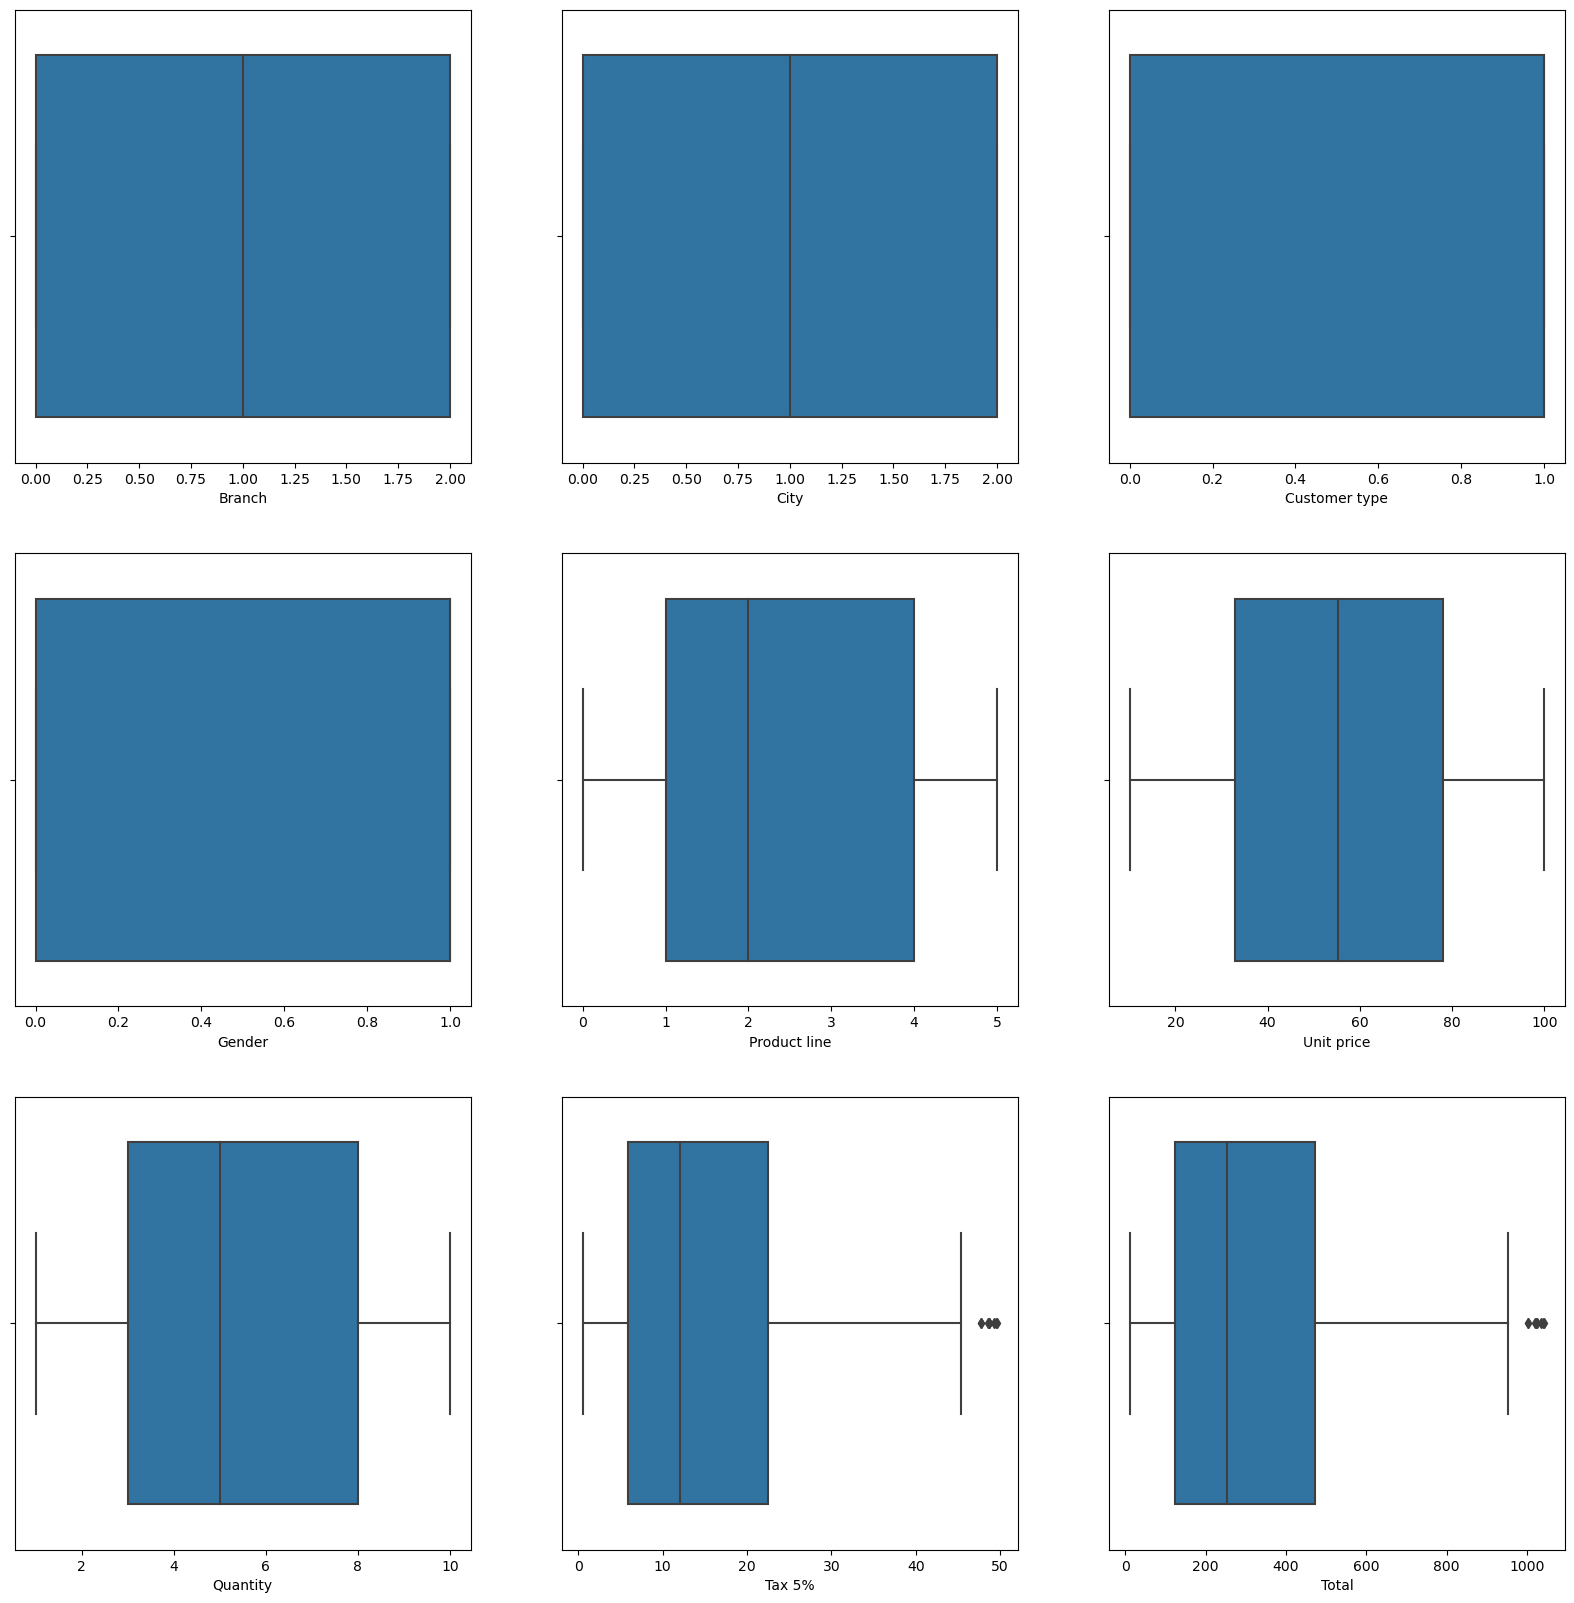

In [34]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<10:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column],data=data)
    plotnumber+=1
plt.show()

* Tax 5% and Total fetures contains outliers.

<AxesSubplot:xlabel='Tax 5%', ylabel='Density'>

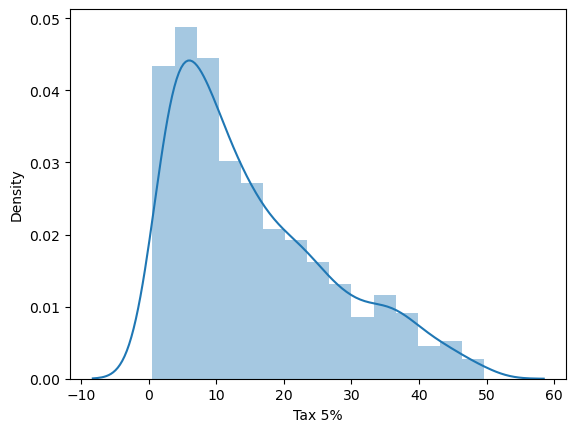

In [35]:
# Check distribution of outliers
sns.distplot(data['Tax 5%'])

In [36]:
# Interquartile range (IQR) 
from scipy import stats
IQR = stats.iqr(data['Tax 5%'],interpolation='midpoint')
IQR

16.56575

In [37]:
# Min & Max limit calculation
# First Quantile
Q1 = data['Tax 5%'].quantile(0.25)
# Third Quantile
Q3 = data['Tax 5%'].quantile(0.75)

In [38]:
# Getting limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [39]:
print("Minimum Limit :",min_limit)
print("Maximum Limit :",max_limit)

Minimum Limit : -18.923750000000002
Maximum Limit : 47.293875


In [40]:
data.loc[data['Tax 5%']<min_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [41]:
data.loc[data['Tax 5%']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,0,0,0,0,4,95.58,10,47.790,1003.590,2019-01-16,2023-06-20 13:32:00,1,955.8,4.761905,47.790,4.8
167,2,2,0,0,1,98.98,10,49.490,1039.290,2019-02-08,2023-06-20 16:20:00,0,989.8,4.761905,49.490,8.7
350,0,0,1,1,1,99.30,10,49.650,1042.650,2019-02-15,2023-06-20 14:53:00,0,993.0,4.761905,49.650,6.6
357,0,0,0,1,5,95.44,10,47.720,1002.120,2019-01-09,2023-06-20 13:45:00,1,954.4,4.761905,47.720,5.2
422,0,0,1,1,1,97.21,10,48.605,1020.705,2019-02-08,2023-06-20 13:00:00,0,972.1,4.761905,48.605,8.7
557,0,0,1,1,2,98.52,10,49.260,1034.460,2019-01-30,2023-06-20 20:23:00,2,985.2,4.761905,49.260,4.5
699,0,0,0,0,4,97.50,10,48.750,1023.750,2019-01-12,2023-06-20 16:18:00,2,975.0,4.761905,48.750,8.0
792,1,1,0,1,4,97.37,10,48.685,1022.385,2019-01-15,2023-06-20 13:48:00,0,973.7,4.761905,48.685,4.9
996,1,1,0,1,4,97.38,10,48.690,1022.490,2019-03-02,2023-06-20 17:16:00,2,973.8,4.761905,48.690,4.4


In [42]:
data.loc[data['Tax 5%'] > max_limit,'Tax 5%'] = np.median(data['Tax 5%'])

<AxesSubplot:xlabel='Tax 5%'>

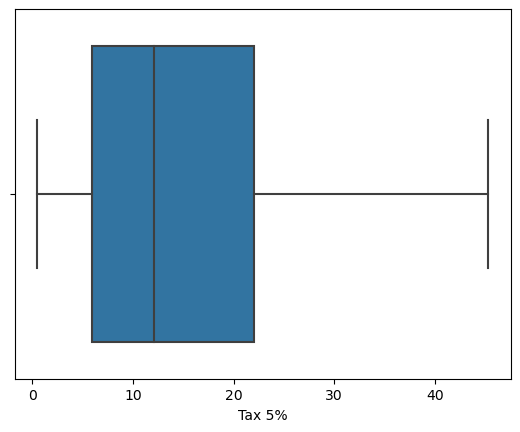

In [43]:
sns.boxplot(data['Tax 5%'])

<AxesSubplot:xlabel='Total', ylabel='Density'>

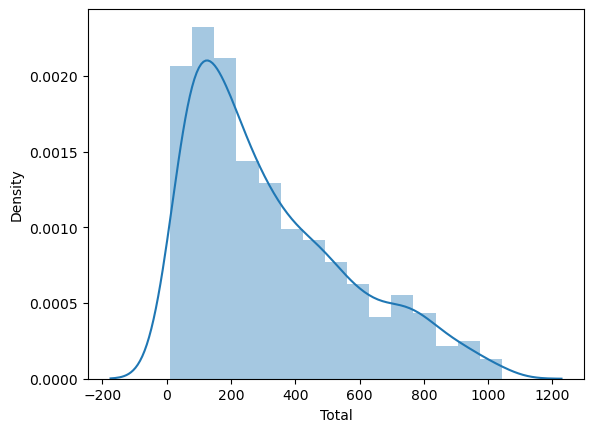

In [44]:
# Check distribution of outliers
sns.distplot(data['Total'])

In [45]:
IQR = stats.iqr(data['Total'],interpolation='midpoint')
IQR

347.8807499999999

In [46]:
# Min & Max limit calculation
# First Quantile
Q1 = data['Total'].quantile(0.25)
# Third Quantile
Q3 = data['Total'].quantile(0.75)
# Getting limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [47]:
print("Minimum Limit :",min_limit)
print("Maximum Limit :",max_limit)

Minimum Limit : -397.39874999999995
Maximum Limit : 993.1713749999999


In [48]:
data.loc[data['Total']<min_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [49]:
data.loc[data['Total']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,0,0,0,0,4,95.58,10,12.088,1003.590,2019-01-16,2023-06-20 13:32:00,1,955.8,4.761905,47.790,4.8
167,2,2,0,0,1,98.98,10,12.088,1039.290,2019-02-08,2023-06-20 16:20:00,0,989.8,4.761905,49.490,8.7
350,0,0,1,1,1,99.30,10,12.088,1042.650,2019-02-15,2023-06-20 14:53:00,0,993.0,4.761905,49.650,6.6
357,0,0,0,1,5,95.44,10,12.088,1002.120,2019-01-09,2023-06-20 13:45:00,1,954.4,4.761905,47.720,5.2
422,0,0,1,1,1,97.21,10,12.088,1020.705,2019-02-08,2023-06-20 13:00:00,0,972.1,4.761905,48.605,8.7
557,0,0,1,1,2,98.52,10,12.088,1034.460,2019-01-30,2023-06-20 20:23:00,2,985.2,4.761905,49.260,4.5
699,0,0,0,0,4,97.50,10,12.088,1023.750,2019-01-12,2023-06-20 16:18:00,2,975.0,4.761905,48.750,8.0
792,1,1,0,1,4,97.37,10,12.088,1022.385,2019-01-15,2023-06-20 13:48:00,0,973.7,4.761905,48.685,4.9
996,1,1,0,1,4,97.38,10,12.088,1022.490,2019-03-02,2023-06-20 17:16:00,2,973.8,4.761905,48.690,4.4


In [50]:
data.loc[data['Total']>max_limit,'Total']=np.median(data['Total'])

In [51]:
data.loc[data['Total']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


<AxesSubplot:xlabel='Total'>

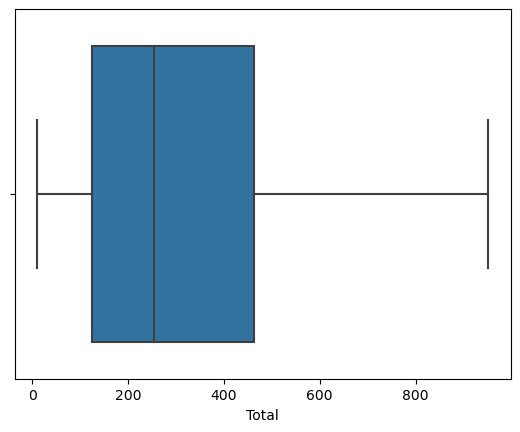

In [52]:
sns.boxplot(data.Total)

## Feature Selection

In [53]:
# Check redundant
data.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,1.012000,1.012000,0.501000,0.501000,2.452000,55.672130,5.510000,15.049521,316.039941,1.034000,307.58738,4.761905e+00,15.379369,6.97270
std,0.817633,0.817633,0.500249,0.500249,1.715412,26.494628,2.923431,11.271937,236.710686,0.809629,234.17651,6.131498e-14,11.708825,1.71858
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,0.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,55.230000,5.000000,12.084000,253.764000,1.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.041000,462.861000,2.000000,448.90500,4.761905e+00,22.445250,8.50000
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,45.325000,951.825000,2.000000,993.00000,4.761905e+00,49.650000,10.00000


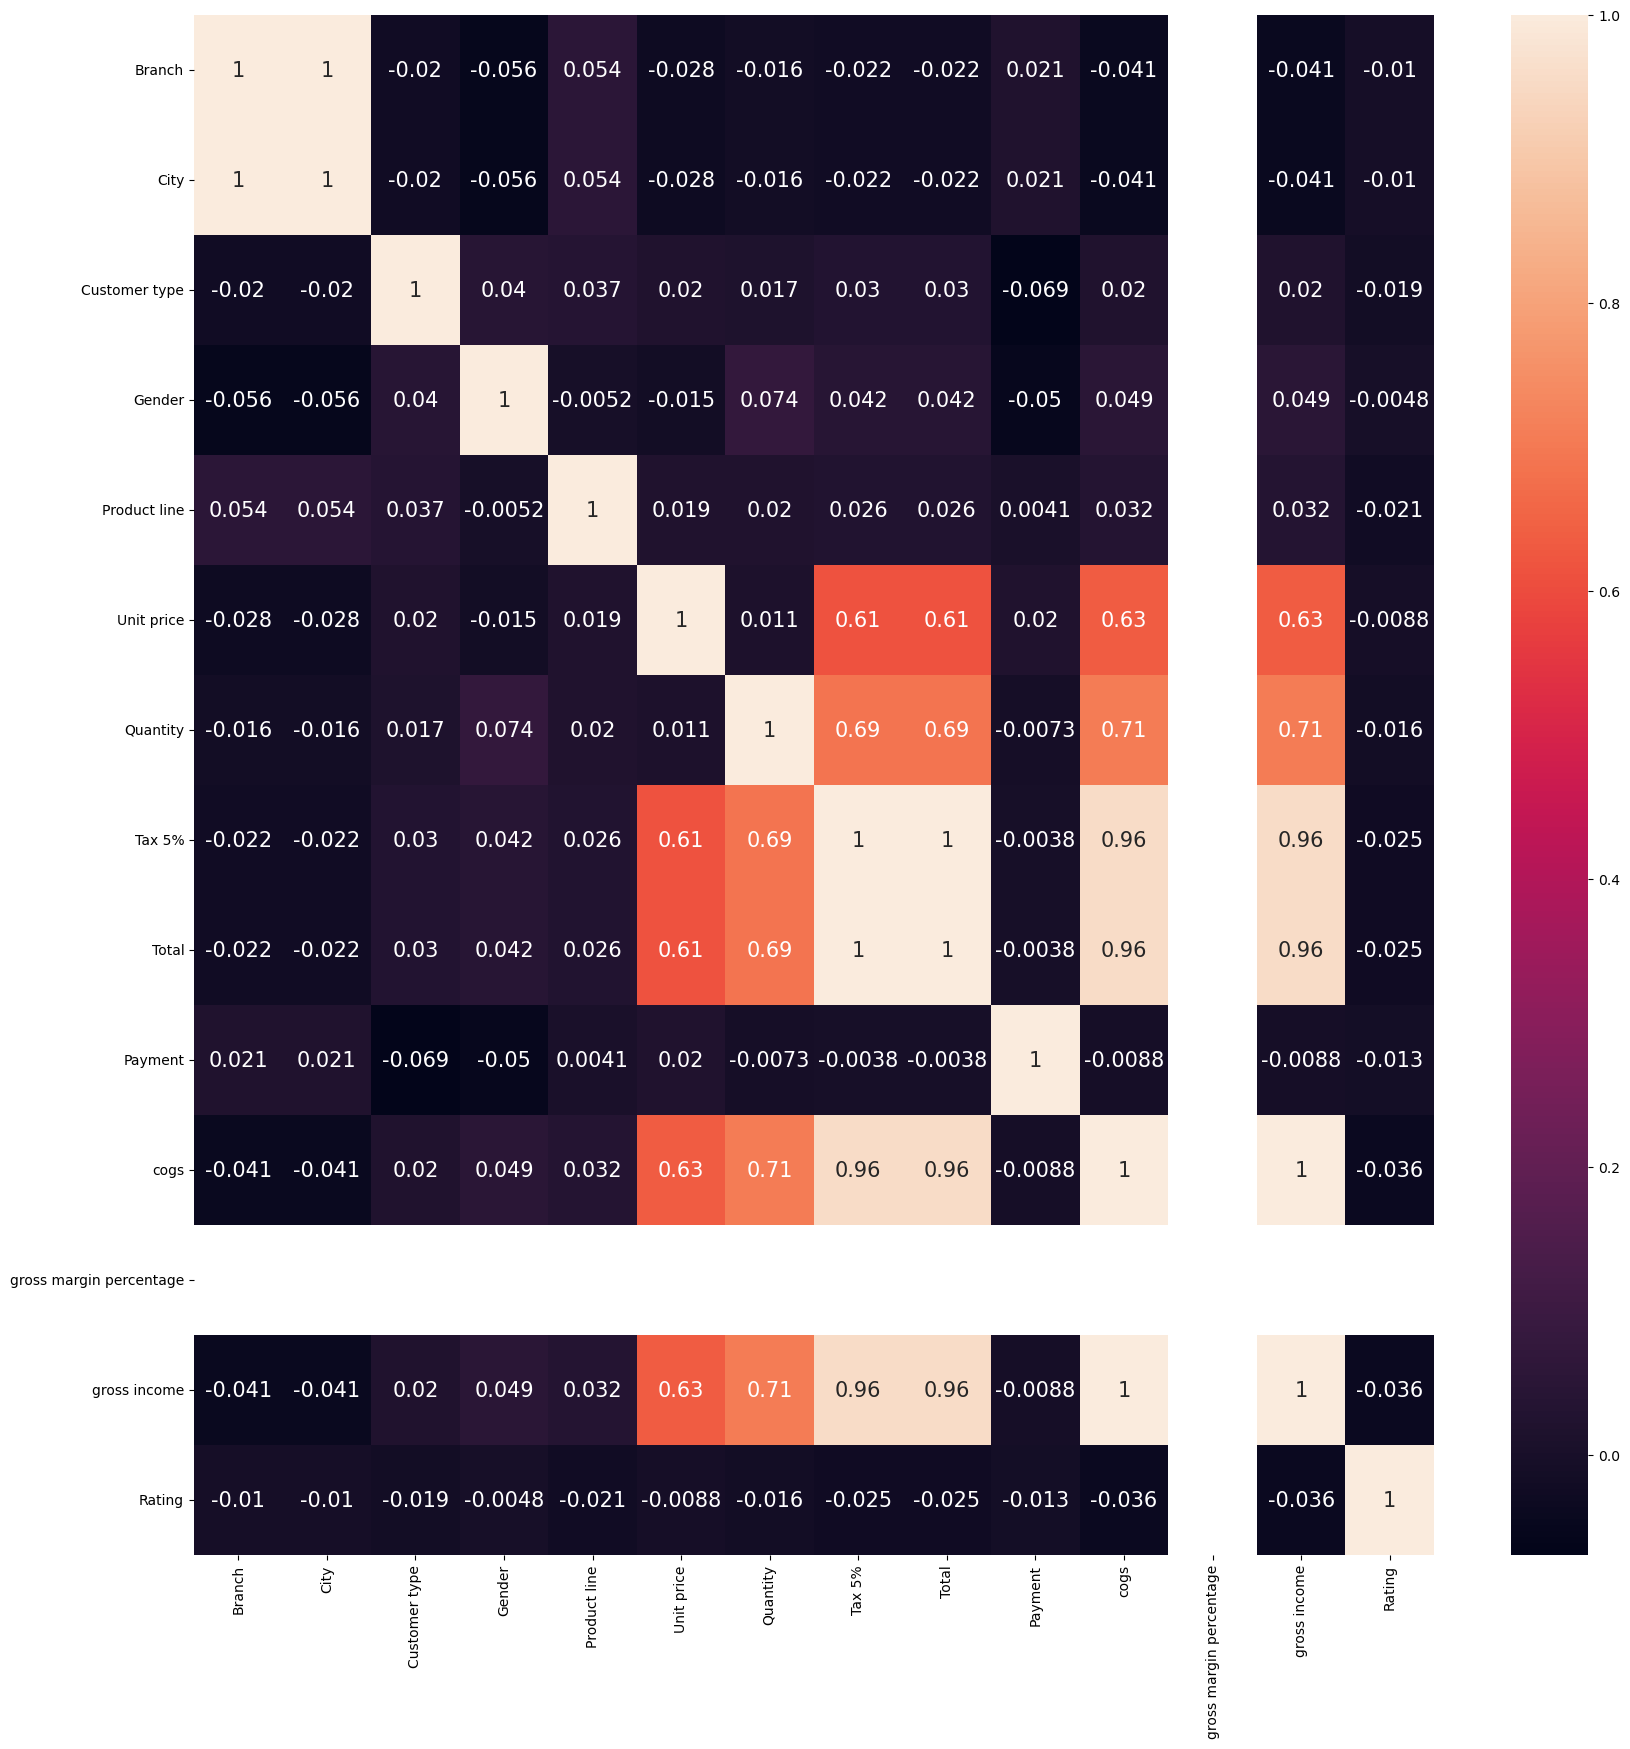

In [54]:
# Check correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':15})
plt.show()

## Model Selection and Building

In [55]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [56]:
data.drop(['Branch','City','Date','Time'],axis=1,inplace=True)

In [57]:
# Creating x & y
x = data.drop('Rating',axis=1)
y = data.Rating

In [58]:
data.Rating.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [59]:
# Splitting data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
print('x train shape :',x_train.shape)
print('x test shape :',x_test.shape)
print('y train shape :',y_train.shape)
print('y test shape :',y_test.shape)

x train shape : (800, 11)
x test shape : (200, 11)
y train shape : (800,)
y test shape : (200,)


#### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_lr_pred = lr.predict(x_test)

In [63]:
from sklearn.metrics import r2_score
print('R2 Score :',r2_score(y_test,y_lr_pred))

R2 Score : -0.004338955379943554


#### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
y_dt_pred = dt.predict(x_test)

In [66]:
print('R2 Score :',r2_score(y_test,y_dt_pred))

R2 Score : -0.9668166112523637


#### Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
y_rf_pred = dt.predict(x_test)

In [69]:
print('R2 Score :',r2_score(y_test,y_rf_pred))

R2 Score : -0.9668166112523637


#### KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [71]:
y_knn_pred = knn.predict(x_test)

In [72]:
print('R2 Score :',r2_score(y_test,y_knn_pred))

R2 Score : -0.12284177586544098


#### Support Vector Machine

In [73]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [74]:
y_svr_pred = svr.predict(x_test)

In [75]:
print('R2 Score :',r2_score(y_test,y_svr_pred))

R2 Score : -0.007400548878755853


#### Bagging

In [76]:
from sklearn.ensemble import BaggingRegressor
bc = BaggingRegressor()
bc.fit(x_train,y_train)

BaggingRegressor()

In [77]:
y_bc_pred = bc.predict(x_test)

In [78]:
print('R2 Score :',r2_score(y_test,y_bc_pred))

R2 Score : -0.24465740921833246


In [79]:
data = [{'Model':'Linear Regression','R2 Score':r2_score(y_test,y_lr_pred)},
        {'Model':'Decision Tree','R2 Score':r2_score(y_test,y_dt_pred)},
        {'Model':'Random Forest','R2 Score':r2_score(y_test,y_rf_pred)},
        {'Model':'KNN','R2 Score':r2_score(y_test,y_knn_pred)},
        {'Model':'SVR','R2 Score':r2_score(y_test,y_svr_pred)},
        {'Model':'Bagging','R2 Score':r2_score(y_test,y_bc_pred)}]

df = pd.DataFrame.from_dict(data)
df

,Model,R2 Score
0,Linear Regression,-0.004339
1,Decision Tree,-0.966817
2,Random Forest,-0.966817
3,KNN,-0.122842
4,SVR,-0.007401
5,Bagging,-0.244657
